In [1]:
import pandas as pd
import os
import numpy as np
from Raw_Cleaner import timestamp_matcher, time_columns, file_to_df, cutter, \
    repeat, timestamp_correction

In [2]:
def file_finder(path,f_type = ".csv" ):
    txt_files=[]
    all_files = os.listdir(path) #tells what directory the files are in
    for i in all_files: #reading only the .txt files 
        if i[-4:] == f_type:
            txt_files.append(i)
    txt_files.sort() #alphabetizes them
    return txt_files

In [8]:
#path='/home/joey/Desktop/2019-SERDP-Raw/SERDP_SLEF_Burn_data/Large-scale-burn-experiment-March-13-2019/Overstory-towers-post-burn-1/'
#path = '/Users/joeyp/Desktop/2019-SERDP-Raw/SERDP_SLEF_Burn_data/Large-scale-burn-experiment-March-13-2019/Overstory-towers-post-burn-1/'
#path = '/home/JoeySeitz/2019-SERDP-Raw/SERDP_SLEF_Burn_data/Large-scale-burn-experiment-March-13-2019/Overstory-towers-post-burn-1/'
path ="/Users/joeyp/Desktop/2019-SERDP-Raw/Large-scale-burn-experiment-March-13-2019/Overstory-towers-post-burn-1/"
burn_files =file_finder(path)

tower_names=[]
for i in range(len(burn_files)):
    tower_names.append(burn_files[i].split("-")[0])

burn_files

['Control-tower-10442-post-burn-1-data.csv',
 'East-tower-11585-post-burn-1-data.csv',
 'Flux-tower-2879-post-burn1-data.csv',
 'Mobile-tower-4390-post-burn-day-three-data.csv',
 'Mobile-tower-4390-post-burn-day-two-data.csv',
 'North-tower-4975-post-burn-1-data.csv',
 'West-tower-4976-post-burn-1-data.csv']

In [9]:
df_Control = timestamp_correction(file_to_df(path,burn_files[0],6,3,False))
df_East    = timestamp_correction(file_to_df(path,burn_files[1],6,3,False))
df_Flux    = timestamp_correction(file_to_df(path,burn_files[2],6,3,False))

df_Mobile_3= timestamp_correction(file_to_df(path,burn_files[3],6,3,False))
df_Mobile_2=timestamp_correction(file_to_df(path,burn_files[4],6,3,False))
df_North   = timestamp_correction(file_to_df(path,burn_files[5],6,3,False))
df_West    = timestamp_correction(file_to_df(path,burn_files[6],6,3,False))

#df_names = [df_Control, df_East, df_Flux, df_Mobile_3, df_Mobile_2, df_North, df_West]


In [10]:
df_Mobile = pd.concat([df_Mobile_2, df_Mobile_3], axis = 0,sort = False,ignore_index=True)

In [14]:
print("Control:", list(df_Control.columns))
print("East   :", list(df_East.columns))
print("Flux   :", list(df_Flux.columns))

print("North  :", list(df_North.columns))
print("West   :", list(df_West.columns))
print("Mobile :", list(df_Mobile.columns))

Control: ['TIMESTAMP', 'RECORD', 'Ux_1', 'Uy_1', 'Uz_1', 'Ts_1', 'diag_rmy_1', 'Ux_2', 'Uy_2', 'Uz_2', 'Ts_2', 'diag_rmy_2', 'Ux_3', 'Uy_3', 'Uz_3', 'Ts_3', 'diag_rmy_3', 'Temp_C(1)', 'Temp_C(2)', 'Temp_C(3)', 'Temp_C(4)', 'Temp_C(5)', 'Temp_C(6)', 'Temp_C(7)']
East   : ['TIMESTAMP', 'RECORD', 'Ux_1', 'Uy_1', 'Uz_1', 'Ts_1', 'diag_rmy_1', 'Ux_2', 'Uy_2', 'Uz_2', 'Ts_2', 'diag_rmy_2', 'Ux_3', 'Uy_3', 'Uz_3', 'Ts_3', 'diag_rmy_3', 'Temp_C(1)', 'Temp_C(2)', 'Temp_C(3)', 'Temp_C(4)', 'Temp_C(5)', 'Temp_C(6)', 'Temp_C(7)']
Flux   : ['TIMESTAMP', 'RECORD', 'Ux_1', 'Uy_1', 'Uz_1', 'Ts_1', 'diag_rmy_1', 'Ux_2', 'Uy_2', 'Uz_2', 'Ts_2', 'diag_rmy_2', 'Ux_3', 'Uy_3', 'Uz_3', 'Ts_3', 'diag_rmy_3', 'Temp_C(1)', 'Temp_C(2)', 'Temp_C(3)', 'Temp_C(4)', 'Temp_C(5)', 'Temp_C(6)', 'Temp_C(7)']
North  : ['TIMESTAMP', 'RECORD', 'Ux_1', 'Uy_1', 'Uz_1', 'Ts_1', 'diag_rmy_1', 'Ux_2', 'Uy_2', 'Uz_2', 'Ts_2', 'diag_rmy_2', 'Ux_3', 'Uy_3', 'Uz_3', 'Ts_3', 'diag_rmy_3', 'Temp_C(1)', 'Temp_C(2)', 'Temp_C(3)', 'Tem

In [24]:
df_Mobile =df_Mobile.drop("Temp_C(0.0 m)", axis= 1)
df_Mobile.describe()

,RECORD,Ux_1,Uy_1,Uz_1,Ts_1,diag_rmy_1,Ux_2,Uy_2,Uz_2,Ts_2,...,Temp_C(1.0 m),Temp_C(2.0 m),Temp_C(3.0 m),Temp_C(4.0 m),Temp_C(5.0 m),Temp_C(6.0 m),Temp_C(7.0 m),Temp_C(8.0 m),Temp_C(9.0 m),Temp_C(10.0 m)
count,1.167162e+06,1.167162e+06,1.167162e+06,1.167162e+06,1.167162e+06,1167162.0,0.0,0.0,0.0,0.0,...,1.167162e+06,1.167162e+06,1.167162e+06,1.167162e+06,1.167162e+06,1.167162e+06,1.167162e+06,1.167162e+06,1.167162e+06,1.167162e+06
mean,2.229379e+06,-4.263067e-02,-2.678842e+00,-3.907154e-02,1.203264e+01,0.0,NaN,NaN,NaN,NaN,...,1.241030e+01,1.241987e+01,1.237563e+01,1.239067e+01,1.241282e+01,1.274434e+01,1.240260e+01,1.239619e+01,1.231211e+01,1.230024e+01
std,3.369311e+05,1.242936e+00,1.753944e+00,7.393545e-01,4.578670e+00,0.0,NaN,NaN,NaN,NaN,...,5.419074e+00,5.415802e+00,5.273796e+00,5.051637e+00,4.993075e+00,5.043922e+00,4.884917e+00,4.973907e+00,4.911296e+00,4.766464e+00
min,1.645798e+06,-8.480000e+00,-1.535000e+01,-4.510000e+00,4.040000e+00,0.0,NaN,NaN,NaN,NaN,...,7.190000e-01,6.160000e-01,9.110000e-01,1.130000e+00,1.414000e+00,1.811000e+00,1.903000e+00,1.635000e+00,1.911000e+00,2.288000e+00
25%,1.937588e+06,-6.800000e-01,-3.800000e+00,-4.600000e-01,5.590000e+00,0.0,NaN,NaN,NaN,NaN,...,5.948000e+00,5.959000e+00,6.012000e+00,6.098000e+00,6.101000e+00,6.273000e+00,6.104000e+00,5.951000e+00,5.943000e+00,6.000000e+00
50%,2.229378e+06,-3.000000e-02,-2.330000e+00,-3.000000e-02,1.395000e+01,0.0,NaN,NaN,NaN,NaN,...,1.360000e+01,1.364000e+01,1.373000e+01,1.385000e+01,1.392000e+01,1.442000e+01,1.394000e+01,1.367000e+01,1.374000e+01,1.393000e+01
75%,2.521170e+06,6.000000e-01,-1.270000e+00,4.000000e-01,1.471000e+01,0.0,NaN,NaN,NaN,NaN,...,1.465000e+01,1.465000e+01,1.463000e+01,1.474000e+01,1.479000e+01,1.529000e+01,1.479000e+01,1.462000e+01,1.463000e+01,1.466000e+01
max,2.812960e+06,9.080000e+00,2.190000e+00,4.620000e+00,2.131000e+01,0.0,NaN,NaN,NaN,NaN,...,2.640000e+01,2.629000e+01,2.523000e+01,2.358000e+01,2.474000e+01,2.428000e+01,2.428000e+01,2.461000e+01,2.352000e+01,2.420000e+01


In [8]:
r_lst = repeat(df_Mobile)

Hurray! No time Repeats


In [9]:
raw_column_mobile = ['Ux_1', 'Uy_1', 'Uz_1', 'Ts_1','Ux_2', 'Uy_2', 'Uz_2', 'Ts_2','Ux_3', 'Uy_3', 'Uz_3','Ts_3',\
                     'Temp_C(10.0 m)', 'Temp_C(9.0 m)', 'Temp_C(8.0 m)', 'Temp_C(7.0 m)', 'Temp_C(6.0 m)', \
                     'Temp_C(5.0 m)', 'Temp_C(4.0 m)', 'Temp_C(3.0 m)', 'Temp_C(2.0 m)', 'Temp_C(1.0 m)', 'Temp_C(0.5 m)']

out_column_tc =['TC(10.0m)', 'TC(9.0m)', 'TC(8.0m)', 'TC(7.0m)', 'TC(6.0m)',\
                'TC(5.0m)', 'TC(4.0m)', 'TC(3.0m)', 'TC(2.0m)', 'TC(1.0m)', 'TC(0.5m)']


sonic_heights =["(21.6m)", "(9.1m)", "(3.4m)"]
sonic_headers = ["U", "V", "W", "T" ]

out_sonic = []
for i in range(len(sonic_heights)):
    for j in range(len(sonic_headers)):
        out_sonic.append(sonic_headers[j]+sonic_heights[i])
out_column_mobile= out_sonic+out_column_tc
print(out_column_mobile)

['U(21.6m)', 'V(21.6m)', 'W(21.6m)', 'T(21.6m)', 'U(9.1m)', 'V(9.1m)', 'W(9.1m)', 'T(9.1m)', 'U(3.4m)', 'V(3.4m)', 'W(3.4m)', 'T(3.4m)', 'TC(10.0m)', 'TC(9.0m)', 'TC(8.0m)', 'TC(7.0m)', 'TC(6.0m)', 'TC(5.0m)', 'TC(4.0m)', 'TC(3.0m)', 'TC(2.0m)', 'TC(1.0m)', 'TC(0.5m)']


In [10]:
df_Mobile.describe()

,RECORD,Ux_1,Uy_1,Uz_1,Ts_1,diag_rmy_1,Ux_2,Uy_2,Uz_2,Ts_2,...,Temp_C(2.0 m),Temp_C(3.0 m),Temp_C(4.0 m),Temp_C(5.0 m),Temp_C(6.0 m),Temp_C(7.0 m),Temp_C(8.0 m),Temp_C(9.0 m),Temp_C(10.0 m),Temp_C(0.0 m)
count,1.167162e+06,1.167162e+06,1.167162e+06,1.167162e+06,1.167162e+06,1167162.0,0.0,0.0,0.0,0.0,...,1.167162e+06,1.167162e+06,1.167162e+06,1.167162e+06,1.167162e+06,1.167162e+06,1.167162e+06,1.167162e+06,1.167162e+06,0.0
mean,2.229379e+06,-4.263067e-02,-2.678842e+00,-3.907154e-02,1.203264e+01,0.0,NaN,NaN,NaN,NaN,...,1.241987e+01,1.237563e+01,1.239067e+01,1.241282e+01,1.274434e+01,1.240260e+01,1.239619e+01,1.231211e+01,1.230024e+01,NaN
std,3.369311e+05,1.242936e+00,1.753944e+00,7.393545e-01,4.578670e+00,0.0,NaN,NaN,NaN,NaN,...,5.415802e+00,5.273796e+00,5.051637e+00,4.993075e+00,5.043922e+00,4.884917e+00,4.973907e+00,4.911296e+00,4.766464e+00,NaN
min,1.645798e+06,-8.480000e+00,-1.535000e+01,-4.510000e+00,4.040000e+00,0.0,NaN,NaN,NaN,NaN,...,6.160000e-01,9.110000e-01,1.130000e+00,1.414000e+00,1.811000e+00,1.903000e+00,1.635000e+00,1.911000e+00,2.288000e+00,NaN
25%,1.937588e+06,-6.800000e-01,-3.800000e+00,-4.600000e-01,5.590000e+00,0.0,NaN,NaN,NaN,NaN,...,5.959000e+00,6.012000e+00,6.098000e+00,6.101000e+00,6.273000e+00,6.104000e+00,5.951000e+00,5.943000e+00,6.000000e+00,NaN
50%,2.229378e+06,-3.000000e-02,-2.330000e+00,-3.000000e-02,1.395000e+01,0.0,NaN,NaN,NaN,NaN,...,1.364000e+01,1.373000e+01,1.385000e+01,1.392000e+01,1.442000e+01,1.394000e+01,1.367000e+01,1.374000e+01,1.393000e+01,NaN
75%,2.521170e+06,6.000000e-01,-1.270000e+00,4.000000e-01,1.471000e+01,0.0,NaN,NaN,NaN,NaN,...,1.465000e+01,1.463000e+01,1.474000e+01,1.479000e+01,1.529000e+01,1.479000e+01,1.462000e+01,1.463000e+01,1.466000e+01,NaN
max,2.812960e+06,9.080000e+00,2.190000e+00,4.620000e+00,2.131000e+01,0.0,NaN,NaN,NaN,NaN,...,2.629000e+01,2.523000e+01,2.358000e+01,2.474000e+01,2.428000e+01,2.428000e+01,2.461000e+01,2.352000e+01,2.420000e+01,NaN


In [11]:
df_Mobile_out= time_columns(df_Mobile)
df_Mobile_out[out_column_mobile] = df_Mobile[raw_column_mobile]


In [12]:
def apply_correction_2(df,u_fctr,v_fctr,m_speed,min_T,fill_nan):
    max_T = 200
    ##For loop for all the sonics
    adjust_U = ['U(21.6m)', 'U(9.1m)', 'U(3.4m)']
    adjust_V = ['V(21.6m)', 'V(9.1m)', 'V(3.4m)']
    adjust_W = ['W(21.6m)', 'W(9.1m)', 'W(3.4m)']
    adjust_wind = adjust_U+adjust_V +adjust_W
    
    #adjust_temp = ['T_19m', 'T_9.5m', 'T_3m']
    for i in range(len(adjust_U)):
        df[adjust_U[i]] *= u_fctr
        df[adjust_V[i]] *= v_fctr
    
    adjust_son = [['U(21.6m)','V(21.6m)','W(21.6m)','T(21.6m)'],['U(9.1m)','V(9.1m)','W(9.1m)','T(9.1m)'],['U(3.4m)','V(3.4m)','W(3.4m)','T(3.4m)']]

    indx = []
    for i in range(len(df)):
        if float(df['T(21.6m)'][i])< min_T or float(df['T(9.1m)'][i])< min_T or float(df['T(3.4m)'][i])< min_T:
            print("--"*15,"LINE:",i,"--"*15)
            print(df.iloc[[i]])
            indx.append(i)
            continue
        if float(df['T(21.6m)'][i])>max_T or float(df['T(9.1m)'][i])>max_T or float(df['T(3.4m)'][i])>max_T:
            print("--"*15,"LINE:",i,"--"*15)
            print(df.iloc[[i]])
            indx.append(i)
            continue
            
        for wind in range(len(adjust_wind)):
            if np.abs(df[adjust_wind[wind]][i]) > m_speed:
                print("--"*15,"LINE:",i,"--"*15)
                print(df.iloc[[i]])
                indx.append(i)
                break    
        for T in range(len(out_column_mobile)):
            if float(df[out_column_mobile[T]][i]) <min_T: # or float(df[out_tc[T]][i]) >max_T:
                indx.append(i)
                break
    if len(indx) ==0:
        print("Data fits these limits")
    if len(indx)!= 0:
        #remove = input("Would you like to remove these lines? (y/n):")
        remove = "y"
        if remove.lower() == "y":
            df = df.drop(df.index[indx])      
   
    df.fillna(value=fill_nan, inplace=True)
    
    return df

In [13]:
fill_nan = np.nan
m_speed,min_T = 50, -20
u_fctr, v_fctr = -1, -1
fmt = "Default Corrections: {}*U, {}*V, Max Wind Speed=|{}| m/s, Min Temperature = {} C  " 
print(fmt.format(u_fctr,v_fctr,m_speed,min_T))

nw_corct = input("Would you like to change these corrections? (y/n): ")
if nw_corct.lower() == "y":
    u_fctr = float(input("What to multiply the U values by?:"))
    v_fctr = float(input("What to multiply the V values by?:"))
    m_speed = float(input("What bounds do you want for the wind speed? (m/s):"))
    min_T = float(input("What is the minimum temperatue? (C):"))

fill_nan = np.nan
change_nan = input("Would you like to change the NaN's to a different value? (y/n):")
if change_nan == "y":
    fill_nan = input("What to replace NaN's with? ex: 9999:")


df_Mobile_out=apply_correction_2(df_Mobile_out,u_fctr,v_fctr,m_speed,min_T,fill_nan)

Default Corrections: -1*U, -1*V, Max Wind Speed=|50| m/s, Min Temperature = -20 C  
Would you like to change these corrections? (y/n): n
Would you like to change the NaN's to a different value? (y/n):y
What to replace NaN's with? ex: 9999:-9999
Data fits these limits


In [14]:
def formater(df,columns):
    for col in columns:
        lst_df=list(df[str(col)])
        for i in range(len(lst_df)):
            lst_df[i] = "{:2.2f}".format(float(lst_df[i])).zfill(5)
        df[col]= lst_df
        
    year_lst, month_lst,day_lst= list(df["YYYY"]), list(df["MM"]), list(df["DD"])
    hour_lst, min_lst, second_lst = list(df["Hr"]), list(df["Min"]), list(df["Sec"])
    for i in range(len(df)):
        year_lst[i]  = "{:.0f}".format(float(year_lst[i])).zfill(4)
        month_lst[i] = "{:.0f}".format(float(month_lst[i])).zfill(2)
        day_lst[i]   = "{:.0f}".format(float(day_lst[i])).zfill(2)
        hour_lst[i]  = "{:.0f}".format(float(hour_lst[i])).zfill(2)
        min_lst[i]   = "{:.0f}".format(float(min_lst[i])).zfill(2)
        second_lst[i]= "{:.1f}".format(float(second_lst[i])).zfill(4)
    
    df["YYYY"] = year_lst
    df["MM"]   = month_lst
    df["DD"]   = day_lst
    df["Hr"] = hour_lst
    df["Min"]  = min_lst
    df["Sec"]  = second_lst
    
    return df

In [15]:
col = ['U(21.6m)', 'V(21.6m)', 'W(21.6m)', 'T(21.6m)', 'U(9.1m)', 'V(9.1m)', 'W(9.1m)', 'T(9.1m)', 'U(3.4m)', 'V(3.4m)', 'W(3.4m)', 'T(3.4m)', 'TC(10.0m)', 'TC(9.0m)', 'TC(8.0m)', 'TC(7.0m)', 'TC(6.0m)', 'TC(5.0m)', 'TC(4.0m)', 'TC(3.0m)', 'TC(2.0m)', 'TC(1.0m)', 'TC(0.5m)']
df = formater(df_Mobile_out,col)
#df.to_csv(path+"burn-mobile_tower.txt", sep=" ",index=False) 
    

In [16]:
df

,YYYY,MM,DD,Hr,Min,Sec,U(21.6m),V(21.6m),W(21.6m),T(21.6m),...,TC(9.0m),TC(8.0m),TC(7.0m),TC(6.0m),TC(5.0m),TC(4.0m),TC(3.0m),TC(2.0m),TC(1.0m),TC(0.5m)
0,2019,03,14,00,00,00.0,-0.03,01.29,00.56,04.94,...,05.32,05.32,05.49,05.66,05.49,05.41,05.41,05.32,05.32,05.41
1,2019,03,14,00,00,00.1,00.08,01.37,00.55,04.92,...,05.32,05.32,05.49,05.66,05.49,05.32,05.41,05.32,05.41,05.41
2,2019,03,14,00,00,00.2,00.03,01.31,00.47,04.94,...,05.32,05.32,05.49,05.74,05.49,05.49,05.41,05.32,05.32,05.41
3,2019,03,14,00,00,00.3,00.09,01.35,00.45,04.94,...,05.32,05.32,05.49,05.66,05.49,05.49,05.41,05.32,05.41,05.41
4,2019,03,14,00,00,00.4,00.09,01.35,00.45,04.94,...,05.32,05.32,05.49,05.66,05.49,05.41,05.32,05.32,05.32,05.41
5,2019,03,14,00,00,00.5,00.13,01.26,00.39,04.92,...,05.32,05.32,05.49,05.66,05.49,05.49,05.32,05.32,05.41,05.41
6,2019,03,14,00,00,00.6,00.24,01.40,00.27,04.92,...,05.32,05.32,05.49,05.74,05.49,05.41,05.32,05.32,05.32,05.41
7,2019,03,14,00,00,00.7,00.24,01.40,00.27,04.92,...,05.32,05.32,05.49,05.66,05.49,05.32,05.49,05.32,05.41,05.41
8,2019,03,14,00,00,00.8,00.29,01.36,00.27,04.90,...,05.32,05.32,05.49,05.66,05.49,05.49,05.41,05.32,05.41,05.41
9,2019,03,14,00,00,00.9,00.37,01.38,00.12,04.92,...,05.32,05.32,05.49,05.66,05.49,05.49,05.32,05.32,05.41,05.41


In [17]:
sv_file = "post-burn-mobile_tower.txt"
df.to_csv(sv_file, sep=' ',index=False)

In [8]:

t_s,t_e = timestamp_matcher(df_names,burn_files)
#trim_df = input("Would you like to trim the data to these timestamps? (y/n):")
#if trim_df.lower() == "y":
#    df_Control= cutter(df_Control, t_s, t_e)
#    df_East   = cutter(df_East, t_s, t_e)
#    df_Flux   = cutter(df_Flux, t_s, t_e)
#    df_Mobile_2 = cutter(df_Mobile_2, t_s, t_e)
#    df_Mobile_3 = cutter(df_Mobile_3, t_s, t_e)
#    df_North  = cutter(df_North, t_s, t_e)
#    df_West   = cutter(df_West, t_s, t_e)

File: Control-tower-10442-post-burn-1-data.csv | Start: 2019-03-14 10:32:26 | End: 2019-03-14 17:04:49.100000
File: East-tower-11585-post-burn-1-data.csv | Start: 2019-03-14 10:01:21 | End: 2019-03-14 16:07:49.600000
File: Flux-tower-2879-post-burn1-data.csv | Start: 2019-03-14 09:24:14 | End: 2019-03-14 19:12:52.700000
File: Mobile-tower-4390-post-burn-day-three-data.csv | Start: 2019-03-15 00:00:00 | End: 2019-03-15 08:25:16.200000
File: Mobile-tower-4390-post-burn-day-two-data.csv | Start: 2019-03-14 00:00:00 | End: 2019-03-14 23:59:59.800000
File: North-tower-4975-post-burn-1-data.csv | Start: 2019-03-14 10:13:49 | End: 2019-03-14 16:36:46.100000
File: West-tower-4976-post-burn-1-data.csv | Start: 2019-03-14 08:57:34 | End: 2019-03-14 18:20:45.900000

Start timestamp Pulled: 2019-03-15 00:00:00 | End Timestamp Pulled: 2019-03-14 16:07:49.600000

Timestamp that can actually be used to trim due to gaps:
Start Time: 2019-03-15 00:00:00 | End Time: 2019-03-14 16:07:49.600000


In [6]:
#df_names = [df_Control, df_East, df_Flux, df_Mobile, df_North, df_West]
df_names = [df_Control, df_East, df_Flux, df_Mobile_3, df_Mobile_2, df_North, df_West]
check = input("Would you like to check for repeated timestamps? Note: if there are repeats, it takes at least 10 mins if there are repeats (y/n):")

if check == "y":
    end_repeat_times = []
    for i in range(len(df_names)):
        print(tower_names[i]+':')
        end_repeat_times.append(repeat(df_names[i])) 
#cut_out_repeat = "n"
#for i in end_repeat_times:
#    if str(i) != "None":
 #       cut_out_repeat = input("Would you like to cut all data at the end of the repeated times? (y/n):")
#        t_s = i
#if cut_out_repeat == "y":     
#    df_Control = cutter(df_Control, t_s, t_e)
#    df_East = cutter(df_East, t_s, t_e)
#    df_Flux = cutter(df_Flux, t_s, t_e)
#    df_Mobile_2 = cutter(df_Mobile_2, t_s, t_e)
#    df_North = cutter(df_North, t_s, t_e)
#    df_West = cutter(df_West, t_s, t_e)

Would you like to check for repeated timestamps? Note: if there are repeats, it takes at least 10 mins if there are repeats (y/n):y
Control:
Hurray! No time Repeats
East:
Hurray! No time Repeats
Flux:
Hurray! No time Repeats
Mobile:
Hurray! No time Repeats
Mobile:
Hurray! No time Repeats
North:
Hurray! No time Repeats
West:
Hurray! No time Repeats


In [15]:
df_West

,TIMESTAMP,RECORD,Ux_1,Uy_1,Uz_1,Ts_1,diag_rmy_1,Ux_2,Uy_2,Uz_2,...,Uz_3,Ts_3,diag_rmy_3,Temp_C(1),Temp_C(2),Temp_C(3),Temp_C(4),Temp_C(5),Temp_C(6),Temp_C(7)
0,2019-03-14 08:57:34.000,2343569,0.06,-1.44,0.12,7.72,0,-0.20,-0.78,0.05,...,-0.01,8.55,0,10.63,7.640,8.80,8.060,7.889,8.55,7.972
1,2019-03-14 08:57:34.100,2343570,0.12,-1.45,0.17,7.67,0,-0.24,-0.79,0.05,...,0.03,8.62,0,10.54,7.640,8.80,8.140,7.889,8.64,7.972
2,2019-03-14 08:57:34.200,2343571,0.12,-1.42,0.12,7.72,0,-0.24,-0.79,0.05,...,0.03,8.60,0,10.54,7.640,8.72,8.060,7.889,8.64,7.972
3,2019-03-14 08:57:34.300,2343572,0.00,-1.43,0.22,7.70,0,-0.18,-0.71,-0.02,...,0.12,8.59,0,10.63,7.640,8.80,8.060,7.889,8.64,7.972
4,2019-03-14 08:57:34.400,2343573,-0.02,-1.46,0.17,7.70,0,-0.24,-0.71,-0.05,...,0.05,8.55,0,10.71,7.640,8.80,7.972,7.889,8.64,7.972
5,2019-03-14 08:57:34.500,2343574,0.00,-1.34,0.13,7.72,0,-0.20,-0.61,-0.04,...,-0.01,8.54,0,10.71,7.640,8.80,7.972,7.889,8.64,7.972
6,2019-03-14 08:57:34.600,2343575,0.00,-1.21,0.24,7.73,0,-0.20,-0.59,-0.11,...,-0.03,8.57,0,10.71,7.640,8.80,8.060,7.806,8.64,7.972
7,2019-03-14 08:57:34.700,2343576,0.08,-1.12,0.25,7.70,0,-0.16,-0.60,-0.08,...,0.05,8.57,0,10.71,7.640,8.80,7.972,7.806,8.64,7.972
8,2019-03-14 08:57:34.800,2343577,0.06,-1.13,0.25,7.70,0,-0.13,-0.68,-0.02,...,-0.03,8.54,0,10.71,7.640,8.80,8.060,7.806,8.64,7.972
9,2019-03-14 08:57:34.900,2343578,0.28,-1.19,0.26,7.77,0,-0.10,-0.71,0.04,...,-0.03,8.52,0,10.71,7.640,8.80,8.060,7.806,8.64,7.972


In [17]:
raw_column = ['Ux_1', 'Uy_1', 'Uz_1', 'Ts_1','Ux_2', 'Uy_2', 'Uz_2', 'Ts_2', 'Ux_3', 'Uy_3', 'Uz_3','Ts_3', 'Temp_C(7)', 'Temp_C(6)', 'Temp_C(5)','Temp_C(4)', 'Temp_C(3)', 'Temp_C(2)', 'Temp_C(1)']

time_columns_lst=["YYYY","MM","DD","Hr","Min","Sec"]
sonc_headers = ["U", "V", "W", "T" ]

sonic_heights =["(19m)", "(9.5m)", "(3m)"]
tc_heights = ["T(15m)","T(10m)","T(5m)","T(2.5m)","T(1.25m)","T(0.5m)","T(0.25m)"]
t_c_columns_3=['Temp_C(15 m)', 'Temp_C(10 m)', 'Temp_C(5 m)', 'Temp_C(2.5 m)','Temp_C(3)', 'Temp_C(2)', 'Temp_C(1)']

tower_names=['Control', 'East', 'Flux', 'North', 'West']

out_tc=["TC(15m)","TC(10m)","TC(5m)","TC(2.5m)","TC(1.25m)","TC(0.5m)","TC(0.25m)"]
sonic_heights =["(19m)", "(9.5m)", "(3m)"]
sonic_headers = ["U", "V", "W", "T" ]

out_sonic = []
for i in range(len(sonic_heights)):
    for j in range(len(sonic_headers)):
        out_sonic.append(sonic_headers[j]+sonic_heights[i])
out_columns=out_sonic+out_tc

In [18]:
df_Control_out, df_East_out= pd.DataFrame(), pd.DataFrame()
df_Flux_out, df_North_out, df_West_out = pd.DataFrame(),pd.DataFrame(), pd.DataFrame()


df_names = [df_Control, df_East, df_Flux, df_North, df_West]
df_out_lst = [df_Control_out, df_East_out, df_Flux_out, df_North_out, df_West_out]

for d in range(len(df_out_lst)):
        df_out_lst[d][time_columns_lst]=time_columns(df_names[d])[time_columns_lst]

df_Control_out[out_columns]=df_names[0][raw_column]
df_East_out[out_columns]=df_names[1][raw_column]
df_Flux_out[out_columns]=df_names[2][raw_column]
df_North_out[out_columns]=df_names[3][raw_column]       
df_West_out[out_columns]=df_names[4][raw_column]  
               
  
        
        

In [19]:
def apply_correction(df,u_fctr,v_fctr,m_speed,min_T,fill_nan):
    max_T = 200
    ##For loop for all the sonics
    adjust_U = ['U(19m)', 'U(9.5m)', 'U(3m)']
    adjust_V = ['V(19m)', 'V(9.5m)', 'V(3m)']
    adjust_W = ['W(19m)', 'W(9.5m)', 'W(3m)']
    adjust_wind = adjust_U+adjust_V +adjust_W
    
    #adjust_temp = ['T_19m', 'T_9.5m', 'T_3m']
    for i in range(len(adjust_U)):
        df[adjust_U[i]] *= u_fctr
        df[adjust_V[i]] *= v_fctr
    
    adjust_son = [['U(19m)','V(19m)','W(19m)','T(19m)'],['U(9.5m)','V(9.5m)','W(9.5m)','T(9.5m)'],['U(3m)','V(3m)','W(3m)','T(3m)']]

    indx = []
    for i in range(len(df)):
        if float(df['T(19m)'][i])< min_T or float(df['T(9.5m)'][i])< min_T or float(df['T(3m)'][i])< min_T:
            print("--"*15,"LINE:",i,"--"*15)
            print(df.iloc[[i]])
            indx.append(i)
            continue
        if float(df['T(19m)'][i])>max_T or float(df['T(9.5m)'][i])>max_T or float(df['T(3m)'][i])>max_T:
            print("--"*15,"LINE:",i,"--"*15)
            print(df.iloc[[i]])
            indx.append(i)
            continue
            
        for wind in range(len(adjust_wind)):
            if np.abs(df[adjust_wind[wind]][i]) > m_speed:
                print("--"*15,"LINE:",i,"--"*15)
                print(df.iloc[[i]])
                indx.append(i)
                break    
        for T in range(len(out_tc)):
            if float(df[out_tc[T]][i]) <min_T  or float(df[out_tc[T]][i]) >max_T:
                indx.append(i)
                break
    if len(indx) ==0:
        print("Data fits these limits")
    if len(indx)!= 0:
        #remove = input("Would you like to remove these lines? (y/n):")
        remove = "y"
        if remove.lower() == "y":
            df = df.drop(df.index[indx])      
   
    df.fillna(value=fill_nan, inplace=True)
    
    return df

In [20]:
df_out_lst = [df_Control_out, df_East_out, df_Flux_out, df_North_out, df_West_out]

fill_nan = np.nan
m_speed,min_T = 50, -20
u_fctr, v_fctr = -1, -1
fmt = "Default Corrections: {}*U, {}*V, Max Wind Speed=|{}| m/s, Min Temperature = {} C  " 
print(fmt.format(u_fctr,v_fctr,m_speed,min_T))

nw_corct = input("Would you like to change these corrections? (y/n): ")
if nw_corct.lower() == "y":
    u_fctr = float(input("What to multiply the U values by?:"))
    v_fctr = float(input("What to multiply the V values by?:"))
    m_speed = float(input("What bounds do you want for the wind speed? (m/s):"))
    min_T = float(input("What is the minimum temperatue? (C):"))

fill_nan = np.nan
change_nan = input("Would you like to change the NaN's to a different value? (y/n):")
if change_nan == "y":
    fill_nan = input("What to replace NaN's with? ex: 9999:")


for i in range(len(df_out_lst)):
    print(tower_names[i]+" Tower:")
    df_out_lst[i]=apply_correction(df_out_lst[i],u_fctr,v_fctr,m_speed,min_T,fill_nan)
    

Default Corrections: -1*U, -1*V, Max Wind Speed=|50| m/s, Min Temperature = -20 C  
Would you like to change these corrections? (y/n): n
Would you like to change the NaN's to a different value? (y/n):y
What to replace NaN's with? ex: 9999:-9999
Control Tower:
Data fits these limits
East Tower:
Data fits these limits
Flux Tower:
------------------------------ LINE: 178864 ------------------------------
        YYYY  MM  DD  Hr Min   Sec  U(19m)  V(19m)  W(19m)  T(19m)    ...      \
178864  2019  03  14  14  22  20.4    1.72    1.34     0.3   19.22    ...       

         V(3m)  W(3m)  T(3m)  TC(15m)  TC(10m)  TC(5m)  TC(2.5m)  TC(1.25m)  \
178864  111.54  59.88 -11.86    19.52    20.01   21.88      21.8      22.45   

        TC(0.5m)  TC(0.25m)  
178864     23.51      24.97  

[1 rows x 25 columns]
North Tower:
Data fits these limits
West Tower:
Data fits these limits


In [21]:

df_out_lst = [df_Control_out, df_East_out, df_Flux_out, df_North_out, df_West_out]
save_me = input("Would you like to save the data into the working directory? (y/n):")
if save_me == "y":
    cwd = os.getcwd()
else:
    cwd = input("Full path of save directory:")

save_dir  = cwd + "/March-2019-Large-Scale-Experiment-Cleaned-Data"

if os.path.exists(save_dir) == False:
    os.mkdir(save_dir)

for i in range(len(df_out_lst)):
    sv_file = save_dir+"/post-burn-"+tower_names[i].lower()+"_tower.txt"
    df_out_lst[i].to_csv(sv_file, sep='\t',index=False)

Would you like to save the data into the working directory? (y/n):y


In [22]:
import os   #used for directory work
import matplotlib.patches as mpatches #used for plot legends
import matplotlib.pyplot as plt   #used for creating plots
import pandas as pd
import numpy as np

In [27]:
def ts_plot(df,df_names,tower):
    #time_s = []
    #for t in range(len(df[d])):
     #   time_s.append(round((float(df=["Hr"][t]))*3600+float(df["Min"][t])*60 + float(df["Sec"][t])\
      #                -((float(df["Hr"][0]))*3600+float(df["Min"][0])*60 + float(df["Sec"][0])),4))


    plt.figure(figsize=(10,6))
    adjust_temp = ['T(19m)', 'T(9.5m)', 'T(3m)']
    for i in range(len(adjust_temp)):
        plt.plot(df[adjust_temp[i]], label = adjust_temp[i],linewidth=.15)
    leg=plt.legend()
    for line in leg.get_lines():
        line.set_linewidth(4)
    plt.title(tower)
    print("Time Start:", df_names["TIMESTAMP"][0])
    print("Time End:", df_names["TIMESTAMP"][len(df)-1])
    plt.ylim(0,30)
    plt.show()

Time Start: 2019-03-14 10:32:26
Time End: 2019-03-14 17:04:49.100000


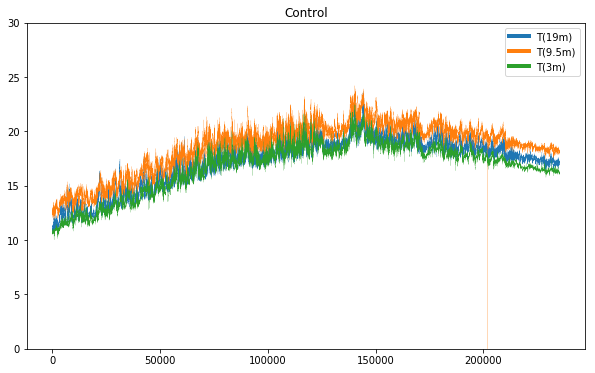

Time Start: 2019-03-14 10:01:21
Time End: 2019-03-14 16:07:49.600000


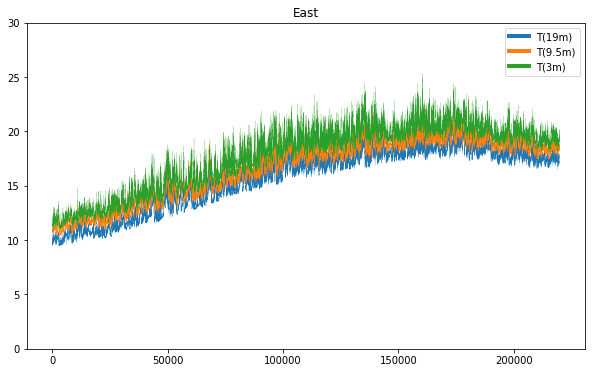

Time Start: 2019-03-14 09:24:14
Time End: 2019-03-14 19:12:52.700000


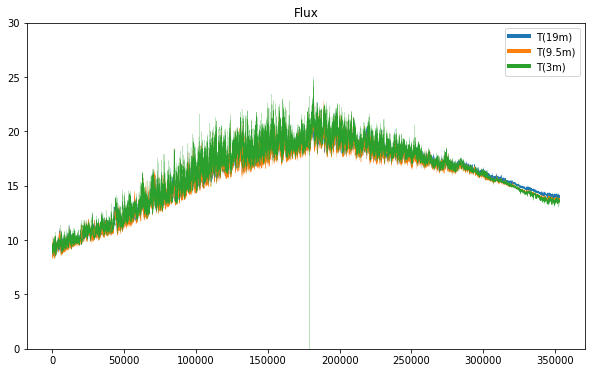

Time Start: 2019-03-14 10:13:49
Time End: 2019-03-14 16:36:46.100000


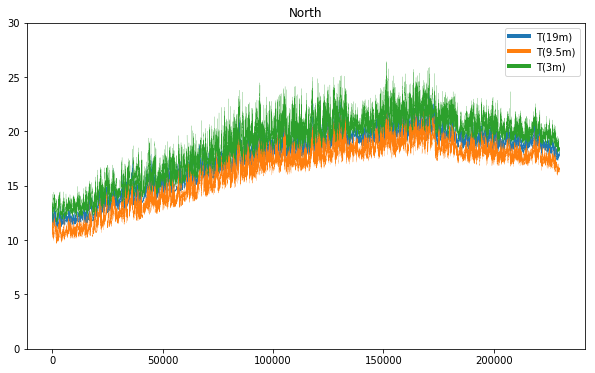

Time Start: 2019-03-14 08:57:34
Time End: 2019-03-14 18:20:45.900000


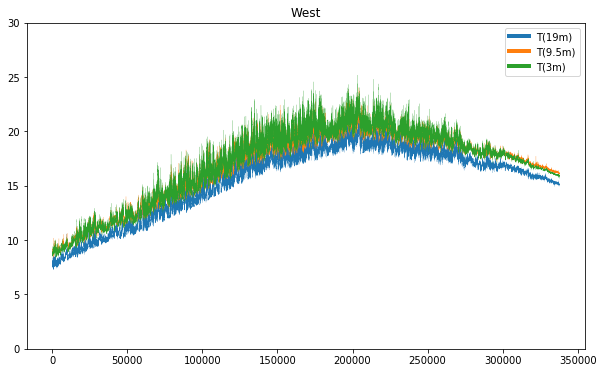

In [28]:
for i in range(len(df_out_lst)):
    
    ts_plot(df_out_lst[i],df_names[i],tower_names[i])